In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import datetime

In [2]:
with open('cachan_weather.json') as json_file:
    data_list = json.load(json_file)

In [3]:
weather_dict = {
    'datetime': [],
    'timestamp': [],
    'weather_main': [],
    'weather_description': [],
    'temp': [],
    'humidity': [],
    'pressure': [],
    'wind_speed': [],
    'wind_deg': [],
    'cloudiness': [],
    'rain_1h': [],
    'rain_3h': [],
    'snow_1h': [],
    'snow_3h': []
}

for data in data_list:
        weather_dict['timestamp'].append(data['dt'])
        weather_dict['datetime'].append(datetime.datetime.fromtimestamp(data['dt']))

        weather_dict['weather_main'].append(data['weather'][0]['main'])
        weather_dict['weather_description'].append(data['weather'][0]['description'])
        weather_dict['temp'].append(data['main']['temp'])
        weather_dict['humidity'].append(data['main']['humidity'])
        weather_dict['pressure'].append(data['main']['pressure'])
        weather_dict['wind_speed'].append(data['wind']['speed'])
        weather_dict['wind_deg'].append(data['wind']['deg'])
        weather_dict['cloudiness'].append(data['clouds']['all'])
            
        try:
            weather_dict['rain_1h'].append(data['rain']['1h'])
        except KeyError:
            weather_dict['rain_1h'].append(0)

        try:
            weather_dict['rain_3h'].append(data['rain']['3h'])
        except KeyError:
            weather_dict['rain_3h'].append(0)

        try:
            weather_dict['snow_1h'].append(data['snow']['1h'])
        except KeyError:
            weather_dict['snow_1h'].append(0)

        try:
            weather_dict['snow_3h'].append(data['snow']['3h'])
        except KeyError:
            weather_dict['snow_3h'].append(0)


weather_df = pd.DataFrame.from_dict(weather_dict)

In [4]:
weather_df.head()

,datetime,timestamp,weather_main,weather_description,temp,humidity,pressure,wind_speed,wind_deg,cloudiness,rain_1h,rain_3h,snow_1h,snow_3h
0,2022-03-18 00:26:39,1647559599,Clear,clear sky,279.27,85,1036,4.12,360,0,0.0,0,0.0,0
1,2022-03-18 01:00:01,1647561601,Clear,clear sky,279.09,85,1036,3.60,20,0,0.0,0,0.0,0
2,2022-03-18 16:45:03,1647618303,Clear,clear sky,288.32,33,1036,9.77,60,0,0.0,0,0.0,0
3,2022-03-21 17:58:10,1647881890,Clear,clear sky,290.82,50,1026,3.09,140,0,0.0,0,0.0,0
4,2022-03-21 18:15:03,1647882903,Clear,clear sky,290.35,52,1026,3.09,150,0,0.0,0,0.0,0


In [5]:
weather_df['temp_in_celsius'] = weather_df.temp - 273.15

In [6]:
import seaborn as sns
sns.set_theme(style='darkgrid')

# Are humidity and temperature related?

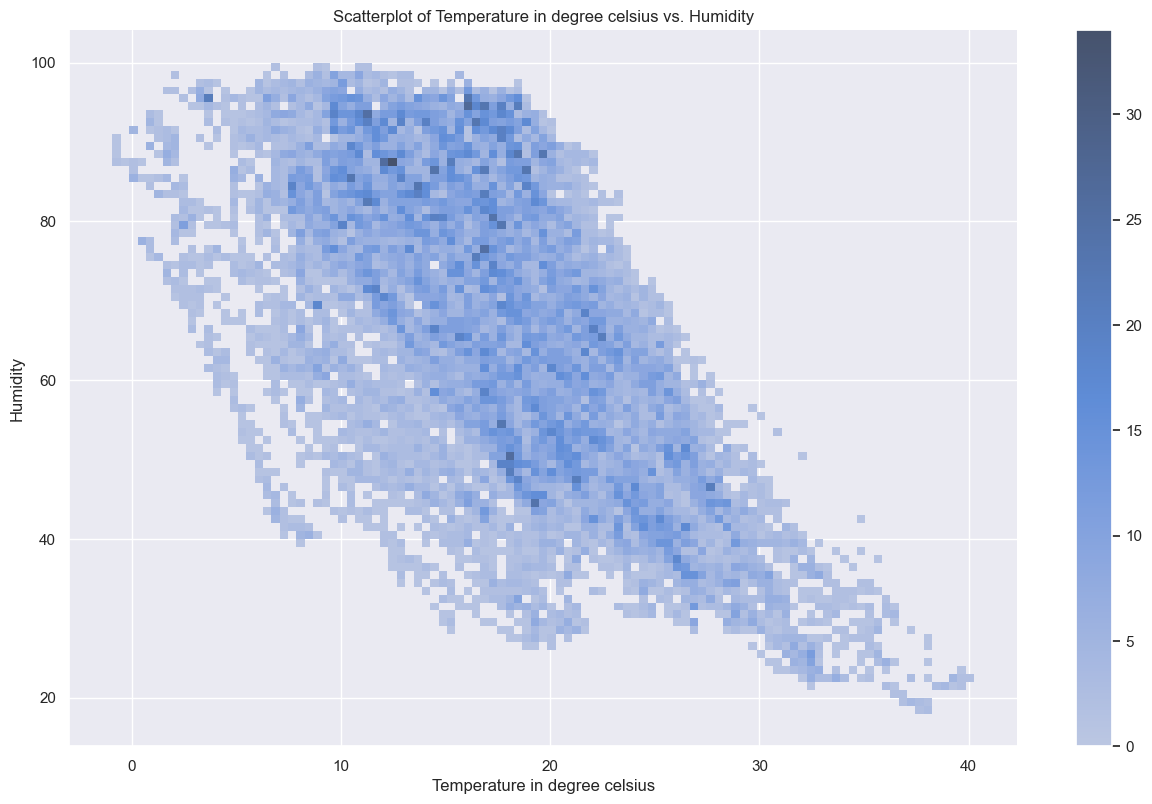

In [7]:
sns.displot(weather_df, x='temp_in_celsius', y='humidity',
            binwidth=(.4, 1.), height=8, aspect=1.6, cbar=True)
plt.xlabel('Temperature in degree celsius')
plt.ylabel('Humidity')
plt.title('Scatterplot of Temperature in degree celsius vs. Humidity')
plt.show()

This scatterplot suggests a negative correlation among the temperature and the humidity.

# Rank the levels of the weather_main and weather_description factor based on their temperature

In [8]:
sorted_weather_main = (weather_df
                       .groupby('weather_main')
                       .mean('temp_in_celsius')
                       .sort_values('temp_in_celsius')
                       .index)

C:\Users\tchak\AppData\Local\Temp\ipykernel_34408\953497075.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(data=weather_df, order=sorted_weather_main, alpha=.5,


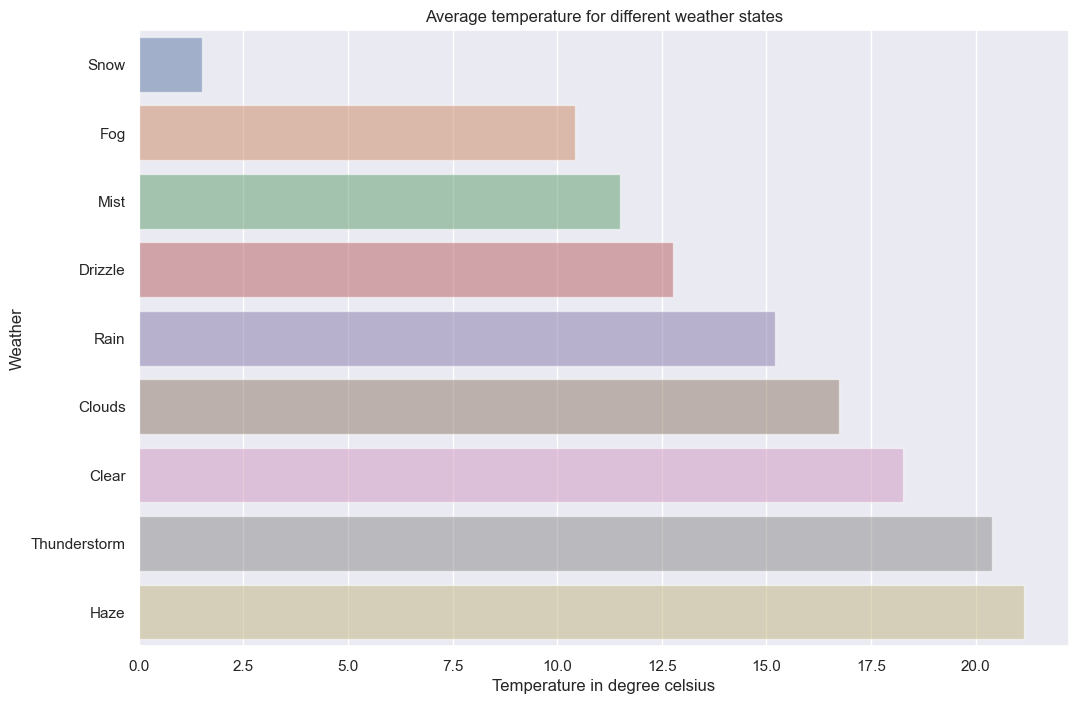

In [9]:
plt.figure(figsize=(12, 8))
sns.barplot(data=weather_df, order=sorted_weather_main, alpha=.5,
            x='temp_in_celsius', y='weather_main', ci=0)
plt.xlabel('Temperature in degree celsius')
plt.ylabel('Weather')
plt.title('Average temperature for different weather states')
plt.show()

In [10]:
import numpy as np

# Creating as random colors as different weather_main values
# Hope it's going to create quite a beautiful palette ;)
weather_main_count = len(pd.unique(weather_df.weather_main))
random_int = lambda: np.random.randint(0, 256)
random_colors = ['#%02X%02X%02X' % (random_int(),random_int(),random_int())
                 for i in range(weather_main_count)]

# Computing the weather descriptions' values for each weather_main value
grouped_weather_descriptions = [pd.unique(weather_df.loc[weather_df.weather_main == weather_main, 'weather_description'])
                                for weather_main in sorted_weather_main]

# (Eventually) Repeating each color in order to have one per weather_main value
bars_colors = []
for i, group in enumerate(grouped_weather_descriptions):
    for description in group:
        bars_colors.append(random_colors[i])

C:\Users\tchak\AppData\Local\Temp\ipykernel_34408\2922279.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(data=sorted_by_weather_main, x='temp_in_celsius', y='weather_description', ci=0,


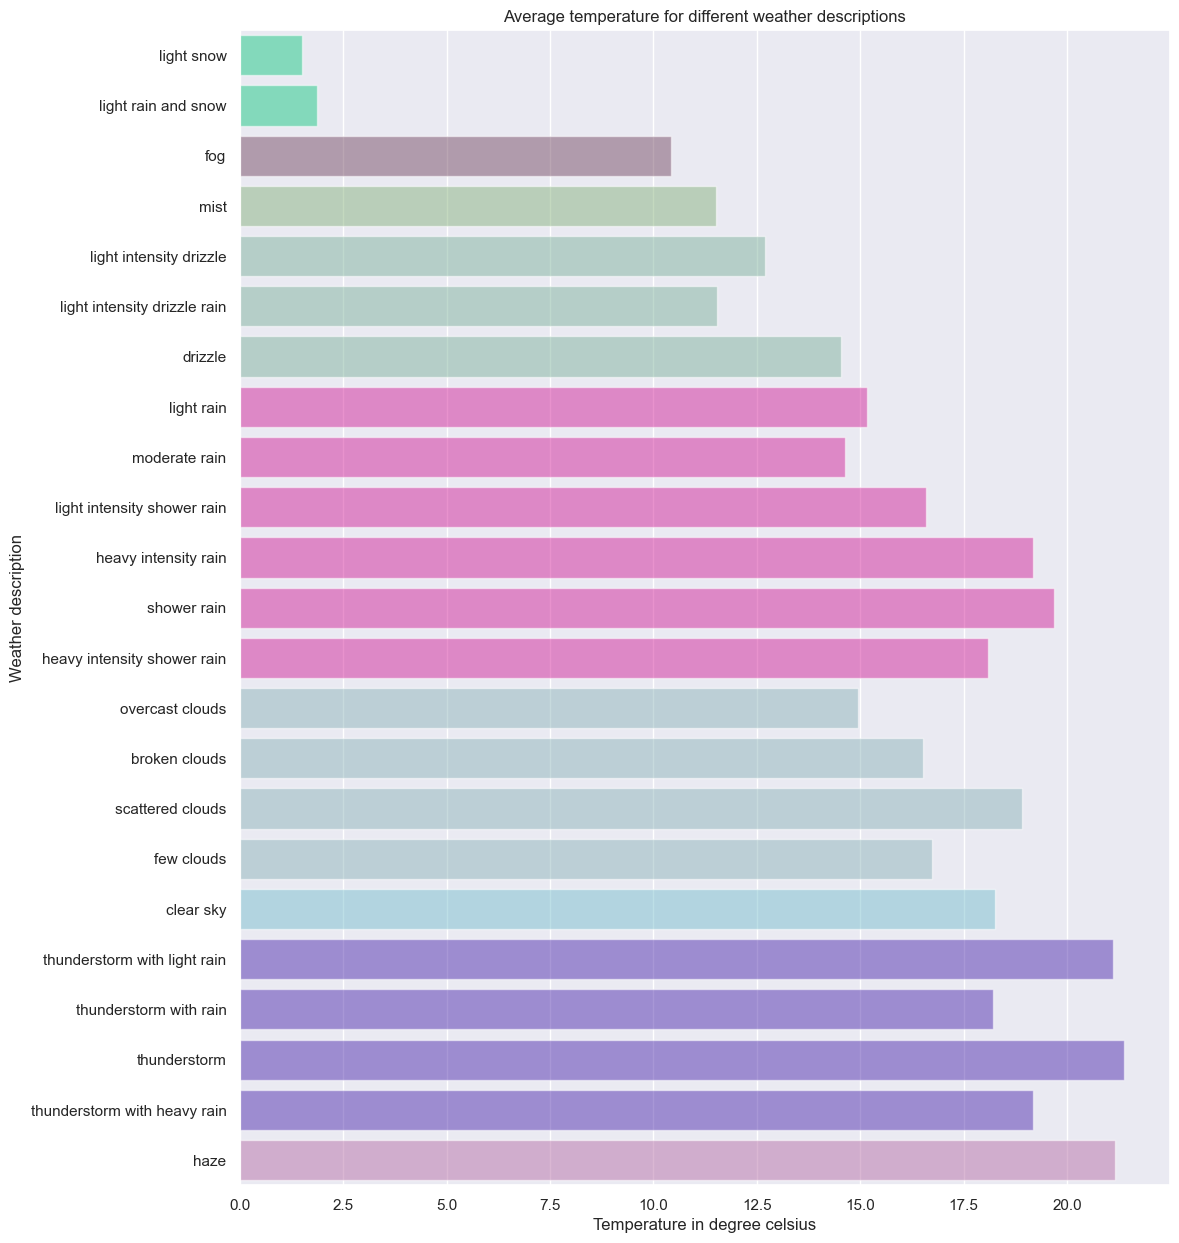

In [11]:
sorted_by_weather_main = pd.concat([weather_df[weather_df.weather_main == weather_main]
                                    for weather_main in sorted_weather_main])

plt.figure(figsize=(12, 15))
sns.barplot(data=sorted_by_weather_main, x='temp_in_celsius', y='weather_description', ci=0,
           palette = bars_colors, alpha=.5)
plt.xlabel('Temperature in degree celsius')
plt.ylabel('Weather description')
plt.title('Average temperature for different weather descriptions')
plt.show()

# Is there a moment of the day when it tends to rain more often?

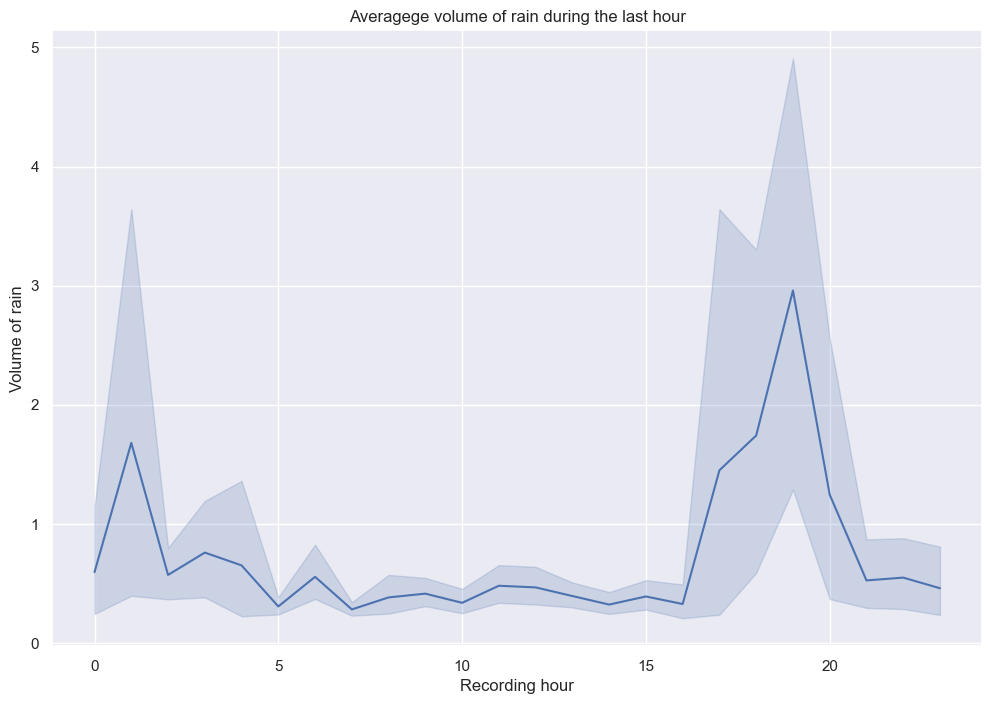

In [12]:
plt.figure(figsize=(12, 8))
weather_df['recording_hour'] = weather_df.datetime.dt.hour
sns.lineplot(data=weather_df[weather_df.rain_1h > 0], x='recording_hour', y='rain_1h')
plt.xlabel('Recording hour')
plt.ylabel('Volume of rain')
plt.title('Averagege volume of rain during the last hour')
plt.show()

According to the foregoing, it's most likely to rain around 4pm-6pm, since the curve representing the average volume of rain during the last hour increases radically in that range.